# 🧹 Retail Sales Data Cleaning Project

## 📌 Project Overview
This project focuses on cleaning a retail sales dataset with issues such as missing values, inconsistent formatting, and duplicate records. The goal is to prepare the data for reliable analysis.

## 🎯 Objectives
- Identify and handle missing values  
- Correct inconsistent text formatting  
- Remove duplicate records  
- Validate calculated fields (e.g., `Total = Quantity × Price per Unit`)  
- Create additional features for future analysis


## 1. 📥 Import Required Libraries and Load the Dataset

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\retail_sales_dirty project2.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1001,2024-01-01,CUST1,Male,25.0,electronics,1,250,250.0
1,1018,2024-01-18,CUST18,FEMALE,29.0,clothing,2,44,88.0
2,1016,2024-01-16,CUST16,Male,25.0,electronics,1,245,245.0
3,1002,2024-01-02,CUST2,Female,34.0,GROCERY,2,20,NaN
4,1009,2024-01-09,CUST9,male,NaN,Clothing,1,60,NaN


## 2. 📊 Basic Data Exploration

In [7]:
# View the last 5 records
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
15,1013,2024-01-13,CUST13,FEMALE,29.0,clothing,2,38,NaN
16,1008,2024-01-08,CUST8,FEMALE,29.0,clothing,4,45,180.0
17,1011,2024-01-11,CUST11,Male,25.0,electronics,1,260,NaN
18,1015,2024-01-15,CUST15,NaN,45.0,grocery,8,13,104.0
19,1007,2024-01-07,CUST7,Female,34.0,GROCERY,2,22,44.0


In [8]:
# check shape of the dataset
df.shape

(20, 9)

In [9]:
#  Get data types and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    20 non-null     int64  
 1   Date              20 non-null     object 
 2   Customer ID       20 non-null     object 
 3   Gender            16 non-null     object 
 4   Age               16 non-null     float64
 5   Product Category  20 non-null     object 
 6   Quantity          20 non-null     int64  
 7   Price per Unit    20 non-null     int64  
 8   Total Amount      15 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ KB


In [10]:
# 📊 Data Types
df.dtypes  # View initial data types

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity              int64
Price per Unit        int64
Total Amount        float64
dtype: object

In [11]:
# 🔄 Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
df['Date'].dtype # Check data type

dtype('<M8[ns]')

In [13]:
# 🔍 Check for Missing Values
print(df.isna().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              4
Age                 4
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        5
dtype: int64


In [14]:
# 🧼 Handle Missing Values
# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19256\118974367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [15]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1001,2024-01-01,CUST1,Male,25.0,electronics,1,250,250.0
1,1018,2024-01-18,CUST18,FEMALE,29.0,clothing,2,44,88.0
2,1016,2024-01-16,CUST16,Male,25.0,electronics,1,245,245.0
3,1002,2024-01-02,CUST2,Female,34.0,GROCERY,2,20,NaN
4,1009,2024-01-09,CUST9,male,34.0,Clothing,1,60,NaN
5,1002,2024-01-02,CUST2,Female,34.0,GROCERY,2,20,NaN
6,1012,2024-01-12,CUST12,Female,34.0,GROCERY,1,21,21.0
7,1004,2024-01-04,CUST4,male,34.0,Clothing,3,50,150.0
8,1019,2024-01-19,CUST19,male,34.0,Clothing,2,59,118.0
9,1017,2024-01-17,CUST17,Female,34.0,GROCERY,1,23,23.0


In [16]:
# Fill missing Total Amount with Quantity × Price per Unit
df['Total Amount'] = df['Total Amount'].fillna(df['Quantity'] * df['Price per Unit'])

In [17]:
# Fill missing Gender with 'Unknown'
df['Gender'].fillna('Unknown',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19256\4010555542.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown',inplace=True)


In [18]:
# 🔍 Check for Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [19]:
# 🧼 Standardize Categorical Values
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Product Category'] = df['Product Category'].str.strip().str.capitalize()

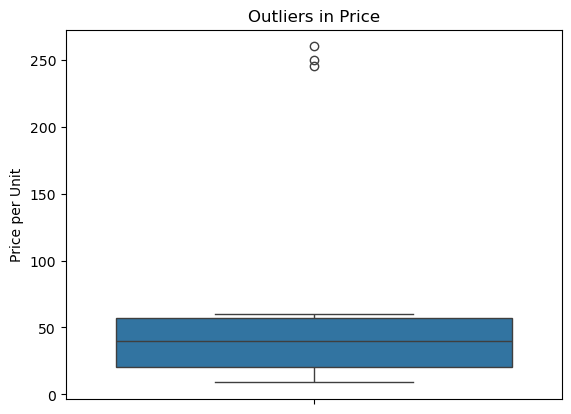

In [20]:
# 📊 Detect & Visualize Outliers in Price
sns.boxplot(df['Price per Unit'])
plt.title('Outliers in Price')
plt.show()

In [21]:
# 🗃️ Sort Dataset for Consistency
df = df.sort_values(by=['Transaction ID', 'Customer ID', 'Date'], ascending=[True, True, True])

In [22]:
# 🔄 Reset Index After Sorting
df.reset_index(drop=True, inplace=True)

# ✅ Final Touches & Feature Engineering
 As a final step, I validated key business rules and created useful time-based features to enhance future analysis.


In [24]:
# ✔️ Validate Business Rule: Total Amount = Quantity × Price per Uni
df['Expected Total'] = df['Quantity'] * df['Price per Unit']
discrepancies = df[df['Total Amount'] != df['Expected Total']]
df.loc[discrepancies.index, 'Total Amount'] = df.loc[discrepancies.index, 'Expected Total']
df.drop(columns=['Expected Total'], inplace=True)

In [25]:
# 🕒 Create New Date-Based Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [26]:
# 💾 Export the Cleaned Dataset
df.to_csv('retail_sales_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as 'retail_sales_cleaned.csv'")

✅ Cleaned dataset saved as 'retail_sales_cleaned.csv'
